### 최종 로지스틱회귀

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [201]:
df = pd.read_csv('./end.csv')
df

,날짜,년도,월,전월대비 등락률,등락률(%),등락률label,외국인순매수,기관순매수,개인순매수,시가총액대비,동행지수,100기준동행지수,동행지수등락률,동행등락label
0,2005-01-31,2005,1,0.041053,4.105277,1,8538,984,-9523,42.9,99.0,0,-0.100000,0
1,2005-02-28,2005,2,0.084336,8.433577,1,14654,-8928,-5725,42.7,98.7,0,-0.303030,0
2,2005-03-31,2005,3,-0.045167,-4.516690,0,-20741,16920,3820,42.2,98.8,0,0.101317,1
3,2005-04-29,2005,4,-0.056313,-5.631266,0,-3243,955,2291,41.9,98.6,0,-0.202429,0
4,2005-05-31,2005,5,0.064644,6.464395,1,1048,17254,-18304,41.7,98.7,0,0.101420,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2021-11-30,2021,11,-0.044323,-4.432316,0,11342,-27380,16641,33.0,101.1,1,0.198216,1
202,2021-12-30,2021,12,0.048834,4.883389,1,15250,15846,-30452,33.5,101.8,1,0.692384,1
203,2022-01-28,2022,1,-0.105556,-10.555634,0,-389,6687,12674,32.7,102.4,1,0.589391,1
204,2022-02-28,2022,2,0.013457,1.345673,1,-6207,-3629,-10135,32.4,102.6,1,0.195312,1


In [202]:
df['등락률label'] = df['등락률label'].astype('category')

In [203]:
df['100기준동행지수'] = df['100기준동행지수'].astype('category')

In [204]:
_df = df.drop('등락률label',axis=1)

In [205]:
_df['날짜'] = _df['날짜'].astype(str)

In [206]:
_df.drop(['날짜','년도','월'],axis=1,inplace=True)


In [240]:
_df.drop(['전월대비 등락률','등락률(%)'],inplace=True,axis=1)

In [208]:
df_target = df['등락률label']

In [209]:
# _df.set_index('날짜', inplace=True)

In [210]:
# _df = _df.values.tolist()

In [211]:
# _df.drop(['년도','월'],axis=1,inplace=True)
_df

,전월대비 등락률,등락률(%),외국인순매수,기관순매수,개인순매수,시가총액대비,동행지수,100기준동행지수,동행지수등락률,동행등락label
0,0.041053,4.105277,8538,984,-9523,42.9,99.0,0,-0.100000,0
1,0.084336,8.433577,14654,-8928,-5725,42.7,98.7,0,-0.303030,0
2,-0.045167,-4.516690,-20741,16920,3820,42.2,98.8,0,0.101317,1
3,-0.056313,-5.631266,-3243,955,2291,41.9,98.6,0,-0.202429,0
4,0.064644,6.464395,1048,17254,-18304,41.7,98.7,0,0.101420,1
...,...,...,...,...,...,...,...,...,...,...
201,-0.044323,-4.432316,11342,-27380,16641,33.0,101.1,1,0.198216,1
202,0.048834,4.883389,15250,15846,-30452,33.5,101.8,1,0.692384,1
203,-0.105556,-10.555634,-389,6687,12674,32.7,102.4,1,0.589391,1
204,0.013457,1.345673,-6207,-3629,-10135,32.4,102.6,1,0.195312,1


In [212]:
_df.columns

Index(['전월대비 등락률', '등락률(%)', '외국인순매수', '기관순매수', '개인순매수', '시가총액대비', '동행지수',
       '100기준동행지수', '동행지수등락률', '동행등락label'],
      dtype='object')

In [213]:
# StandardScaler()로 평균이 0, 분산 1과 데이터 분포도 현황
scaler = StandardScaler()
data_scaled = scaler.fit_transform(_df)

X_train, X_test, y_train, y_test = train_test_split(
    data_scaled, df_target, test_size=0.3, random_state = 0)

In [214]:
# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.919
roc_auc: 0.914


In [215]:
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2', 'l1'], 'C': [0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid =params, scoring = 'accuracy', cv=3)
grid_clf.fit(data_scaled, df_target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 5, 'penalty': 'l2'}, 최적 평균 정확도:0.932


C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jangd\AppData\Local\Programs\Pyth

Feature_importance 상위 6개 features만 선별해서 시행한 로지스틱 회귀분석
==
최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.713
--

In [216]:
s_df = pd.read_csv('./end.csv')

In [217]:
s_df

,날짜,년도,월,전월대비 등락률,등락률(%),등락률label,외국인순매수,기관순매수,개인순매수,시가총액대비,동행지수,100기준동행지수,동행지수등락률,동행등락label
0,2005-01-31,2005,1,0.041053,4.105277,1,8538,984,-9523,42.9,99.0,0,-0.100000,0
1,2005-02-28,2005,2,0.084336,8.433577,1,14654,-8928,-5725,42.7,98.7,0,-0.303030,0
2,2005-03-31,2005,3,-0.045167,-4.516690,0,-20741,16920,3820,42.2,98.8,0,0.101317,1
3,2005-04-29,2005,4,-0.056313,-5.631266,0,-3243,955,2291,41.9,98.6,0,-0.202429,0
4,2005-05-31,2005,5,0.064644,6.464395,1,1048,17254,-18304,41.7,98.7,0,0.101420,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2021-11-30,2021,11,-0.044323,-4.432316,0,11342,-27380,16641,33.0,101.1,1,0.198216,1
202,2021-12-30,2021,12,0.048834,4.883389,1,15250,15846,-30452,33.5,101.8,1,0.692384,1
203,2022-01-28,2022,1,-0.105556,-10.555634,0,-389,6687,12674,32.7,102.4,1,0.589391,1
204,2022-02-28,2022,2,0.013457,1.345673,1,-6207,-3629,-10135,32.4,102.6,1,0.195312,1


In [218]:
s_df['등락률label'] = s_df['등락률label'].astype('category')
s_df['100기준동행지수'] = s_df['100기준동행지수'].astype('category')
s_df['동행등락label'] = s_df['동행등락label'].astype('category')

In [219]:
_s_df = s_df.drop(['등락률label','월','년도'],axis=1)
_s_df

,날짜,전월대비 등락률,등락률(%),외국인순매수,기관순매수,개인순매수,시가총액대비,동행지수,100기준동행지수,동행지수등락률,동행등락label
0,2005-01-31,0.041053,4.105277,8538,984,-9523,42.9,99.0,0,-0.100000,0
1,2005-02-28,0.084336,8.433577,14654,-8928,-5725,42.7,98.7,0,-0.303030,0
2,2005-03-31,-0.045167,-4.516690,-20741,16920,3820,42.2,98.8,0,0.101317,1
3,2005-04-29,-0.056313,-5.631266,-3243,955,2291,41.9,98.6,0,-0.202429,0
4,2005-05-31,0.064644,6.464395,1048,17254,-18304,41.7,98.7,0,0.101420,1
...,...,...,...,...,...,...,...,...,...,...,...
201,2021-11-30,-0.044323,-4.432316,11342,-27380,16641,33.0,101.1,1,0.198216,1
202,2021-12-30,0.048834,4.883389,15250,15846,-30452,33.5,101.8,1,0.692384,1
203,2022-01-28,-0.105556,-10.555634,-389,6687,12674,32.7,102.4,1,0.589391,1
204,2022-02-28,0.013457,1.345673,-6207,-3629,-10135,32.4,102.6,1,0.195312,1


In [220]:
_s_df['날짜'] = _s_df['날짜'].astype(str)

In [221]:
s_df_target = s_df['등락률label']

In [222]:
# _s_df.set_index('날짜', inplace=True)

In [223]:
_s_df = _s_df.loc[:, ['외국인순매수','개인순매수','기관순매수','시가총액대비','동행지수','동행등락label']]
_s_df

,외국인순매수,개인순매수,기관순매수,시가총액대비,동행지수,동행등락label
0,8538,-9523,984,42.9,99.0,0
1,14654,-5725,-8928,42.7,98.7,0
2,-20741,3820,16920,42.2,98.8,1
3,-3243,2291,955,41.9,98.6,0
4,1048,-18304,17254,41.7,98.7,1
...,...,...,...,...,...,...
201,11342,16641,-27380,33.0,101.1,1
202,15250,-30452,15846,33.5,101.8,1
203,-389,12674,6687,32.7,102.4,1
204,-6207,-10135,-3629,32.4,102.6,1


In [224]:
# StandardScaler()로 평균이 0, 분산 1과 데이터 분포도 현황
scaler = StandardScaler()
s_data_scaled = scaler.fit_transform(_s_df)

X_train, X_test, y_train, y_test = train_test_split(
    s_data_scaled, s_df_target, test_size=0.3, random_state = 0)

In [225]:
# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.677
roc_auc: 0.671


In [226]:
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2', 'l1'], 'C': [0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid =params, scoring = 'accuracy', cv=3)
grid_clf.fit(s_data_scaled, s_df_target)
# StandardScaler()로 평균이 0, 분산 1과 데이터 분포도 현황
scaler = StandardScaler()
s_data_scaled = scaler.fit_transform(_s_df)

print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 5, 'penalty': 'l2'}, 최적 평균 정확도:0.698


C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jangd\AppData\Local\Programs\Pyth

In [242]:
# StandardScaler()로 평균이 0, 분산 1과 데이터 분포도 현황
scaler = StandardScaler()
s_data_scaled = scaler.fit_transform(_df)

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


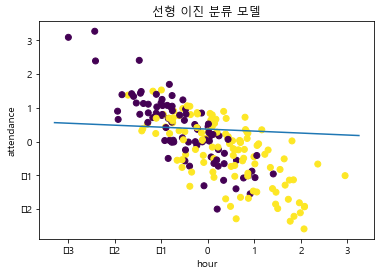

In [243]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##########데이터 로드

x_data = np.array(s_data_scaled)
y_data = np.array(df_target)

##########데이터 분석

##########데이터 전처리

##########모델 생성
model = LogisticRegression(penalty='l2', C=10)


##########모델 학습

model.fit(x_data, y_data)

x_data, y_data = np.array(x_data), np.array(y_data)

import matplotlib.pylab as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic') #한글 폰트 설정
#
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
#
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
x_plot = np.linspace(xmin,xmax) #np.linspace(start, stop, num=50)
'''
for coef, intercept in zip(model.coef_,model.intercept_):
    plt.plot(x_plot, -(x_plot * coef[0] + intercept)/ coef[1])
'''
#'''
plt.plot(x_plot, -(x_plot * model.coef_[0][0] + model.intercept_[0])/ model.coef_[0][1])
##    -(x1* model.coef_[0][0] + model.intercept_[0]) = x2*model.coef_[0][1]
##    x1* model.coef_[0][0] + model.intercept_[0] = -x2*model.coef_[0][1]
##    x1* model.coef_[0][0] + model.intercept_[0] + x2*model.coef_[0][1] = 0
#'''
#
plt.title('선형 이진 분류 모델')
plt.xlabel('hour')
plt.ylabel('attendance')
plt.show()

In [229]:
_df

,전월대비 등락률,등락률(%),외국인순매수,기관순매수,개인순매수,시가총액대비,동행지수,100기준동행지수,동행지수등락률,동행등락label
0,0.041053,4.105277,8538,984,-9523,42.9,99.0,0,-0.100000,0
1,0.084336,8.433577,14654,-8928,-5725,42.7,98.7,0,-0.303030,0
2,-0.045167,-4.516690,-20741,16920,3820,42.2,98.8,0,0.101317,1
3,-0.056313,-5.631266,-3243,955,2291,41.9,98.6,0,-0.202429,0
4,0.064644,6.464395,1048,17254,-18304,41.7,98.7,0,0.101420,1
...,...,...,...,...,...,...,...,...,...,...
201,-0.044323,-4.432316,11342,-27380,16641,33.0,101.1,1,0.198216,1
202,0.048834,4.883389,15250,15846,-30452,33.5,101.8,1,0.692384,1
203,-0.105556,-10.555634,-389,6687,12674,32.7,102.4,1,0.589391,1
204,0.013457,1.345673,-6207,-3629,-10135,32.4,102.6,1,0.195312,1


In [230]:
df_target

0      1
1      1
2      0
3      0
4      1
      ..
201    0
202    1
203    0
204    1
205    1
Name: 등락률label, Length: 206, dtype: category
Categories (2, int64): [0, 1]